# Project-1 : Flight Price Prediction

## Aim : Here we aim is to find the model which provides highest accuracy in determining the price of a flight ticket with minimum coefficient of variation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.colors as pltc
from scipy.stats import boxcox, skew, norm, kurtosis

In [2]:
plt.rcParams['figure.figsize'] = 10,10
warnings.filterwarnings('ignore')
sns.set_style(style = 'darkgrid')

In [3]:
na_l = ['NaN','nan','NAN','--','?','-',' ']

df = pd.read_excel(r"C:\Users\Munj Patel\Desktop\INTERNSHIP\DATA_MITES\PROJECT_1\PRCP-1025-flight-fare\Flight_Fare.xlsx", na_values=na_l)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


# EDA

## Finding and dropping the dupliacate values:

In [9]:
df[df.duplicated() == True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [10]:
df = df.drop_duplicates()

In [11]:
df = df.reset_index(drop=True)

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10459,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10460,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10461,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Outlier Treatment

In [13]:
def outlier_detection(data_name,column_name):
    d = data_name[column_name].describe()
    
    IQR = d[-2] - d[-4]
    
    # Also check using 1.5IQR and take the one which provides better answer.
    
    lower = np.where(data_name[column_name] < d[-4] - 3*IQR)[0]
    upper = np.where(data_name[column_name] > d[-2] + 3*IQR)[0]

    s_l = set(lower)
    s_u = set(upper)
    
    s = s_l.union(s_u)
    
    global s_arr
    s_arr = np.array([i for i in s])
    
    print(f'Number of outliers in {column_name}: {len(s_arr)}.')

In [14]:
outlier_detection(df,'Price')

out_price = s_arr

Number of outliers in Price: 16.


In [15]:
df['Price'][out_price] = np.nan

In [16]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10459,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10460,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10461,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


## Missing Values

In [17]:
df.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info     0
Price              16
dtype: int64

In [18]:
df.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info     0
Price              16
dtype: int64

In [19]:
l = df['Price']

df = df.drop('Price',axis=1).dropna()
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
df['Price'] = l
df['Price'] = df['Price'].fillna(value = df['Price'].median())

In [22]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [23]:
df = df.reset_index(drop=True)

## Coutplot of Categorical Variables:

Most frequently occuring Airline in dataset is Jet Airways.
Least frequently occuring Airline in dataset is Trujet.


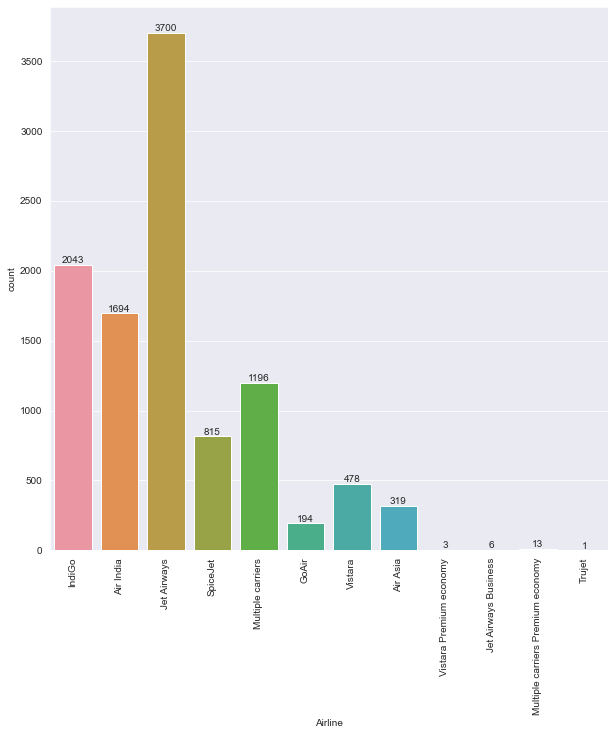

Most frequently occuring Source in dataset is Delhi.
Least frequently occuring Source in dataset is Chennai.


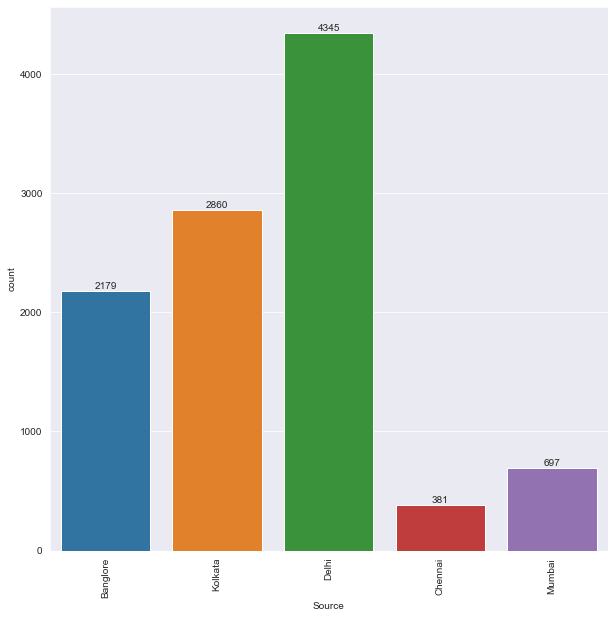

Most frequently occuring Destination in dataset is Cochin.
Least frequently occuring Destination in dataset is Kolkata.


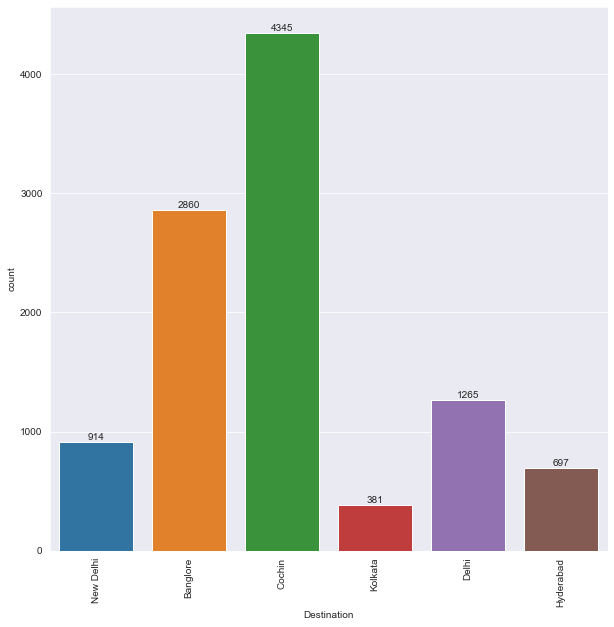

Most frequently occuring Total_Stops in dataset is 1 stop.
Least frequently occuring Total_Stops in dataset is 4 stops.


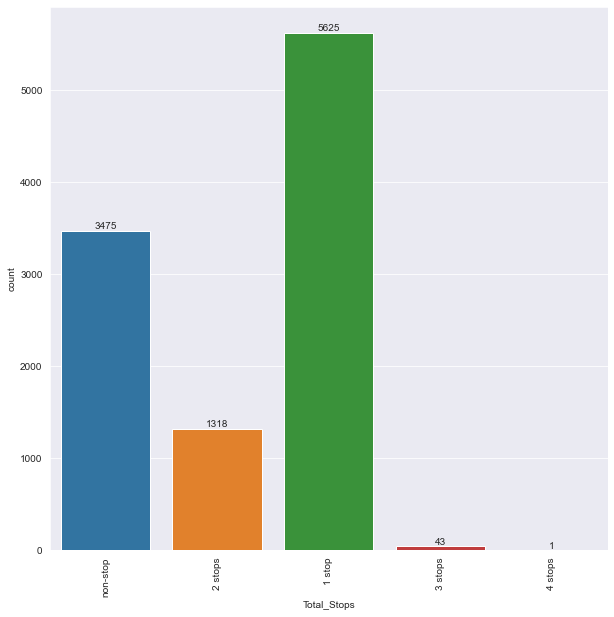

Most frequently occuring Additional_Info in dataset is No info.
Least frequently occuring Additional_Info in dataset is 2 Long layover.


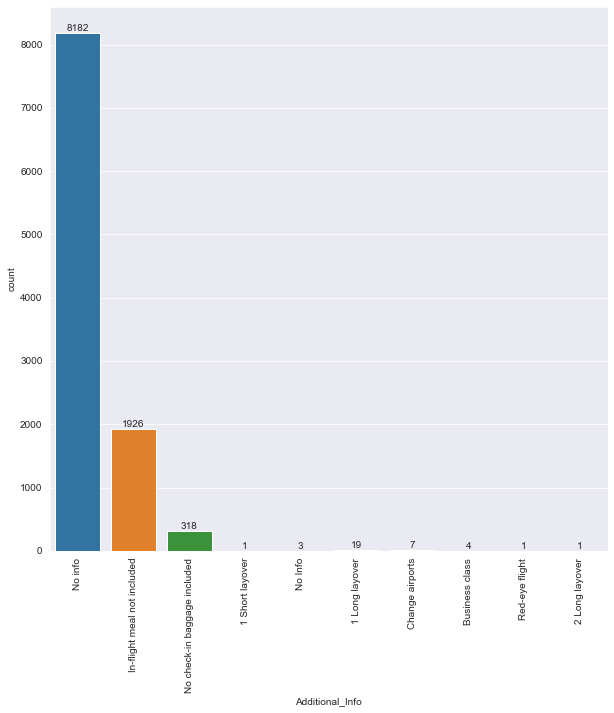

In [24]:
l_c = ['Airline','Source','Destination','Total_Stops','Additional_Info']

for i in l_c:
    ax = sns.countplot(df[i])
    for j in ax.containers:
        ax.bar_label(j)

    plt.xticks(rotation = 90)
    print(f'Most frequently occuring {i} in dataset is {list(dict(df[i].value_counts()).keys())[0]}.')
    print(f'Least frequently occuring {i} in dataset is {list(dict(df[i].value_counts()).keys())[-1]}.')
    plt.show()

## Creating new columns for Dep_Time, Arrival_time, Duration and Date:

In [25]:
l_n = [i.split(':') for i in df['Dep_Time']]

df['Dep_Time_Hour'] = [int(l_n[i][0]) for i in range(0,len(l_n))]
df['Dep_Time_Min'] = [int(l_n[i][1]) for i in range(0,len(l_n))]

df = df.drop('Dep_Time',axis=1)

In [26]:
df = df.drop(df['Duration'][df['Duration'] == '5m'].index[0], axis=0)
df = df.reset_index(drop = True)

In [27]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: 
             duration[i]=duration[i] + ' 0m'
        else:
             duration[i]='0h '+ duration[i]
                
df['Duration'] = duration

df['Dur_Hours'] = [int(df['Duration'][i].split('h')[0]) for i in range(0,len(df['Duration']))]
df['Dur_Minis'] = [int(df['Duration'][i].split('m')[0].split('h')[1]) for i in range(0,len(df['Duration']))]

df = df.drop('Duration', axis=1)

In [28]:
df['Arr_Time_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Time_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df = df.drop('Arrival_Time', axis=1)

In [29]:
l_d_o_j = [i.split('/' ) for i in df['Date_of_Journey']]

l_d_o_j
df['DOJ_Day'] = [int(l_d_o_j[i][0]) for i in range(0,len(l_d_o_j))]
df['DOJ_Month'] = [int(l_d_o_j[i][1]) for i in range(0,len(l_d_o_j))]

df = df.drop('Date_of_Journey', axis = 1)

### Longest Flight

In [30]:
df[df['Dur_Hours'] == max(df['Dur_Hours'])]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Dur_Hours,Dur_Minis,Arr_Time_Hour,Arr_Time_Min,DOJ_Day,DOJ_Month
1065,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2 stops,No info,20064.0,5,25,47,0,4,25,3,3
10246,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,20694.0,19,10,47,40,18,50,6,3


The Longest flight Duration is for Delhi -> Cochin.

### Shortest Flight

In [31]:
df[df['Dur_Hours'] == min(df['Dur_Hours'])]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Dur_Hours,Dur_Minis,Arr_Time_Hour,Arr_Time_Min,DOJ_Day,DOJ_Month
67,Air India,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,3625.0,13,55,1,30,15,25,6,5
70,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,5678.0,7,5,1,25,8,30,1,6
77,IndiGo,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,4049.0,6,25,1,30,7,55,3,4
98,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,8040.0,7,5,1,25,8,30,18,6
121,Air India,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,3100.0,15,0,1,25,16,25,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10393,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,4050.0,7,5,1,25,8,30,18,5
10398,IndiGo,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2754.0,2,35,1,30,4,5,27,5
10435,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,5678.0,2,55,1,25,4,20,3,5
10451,Air India,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,3100.0,21,5,1,20,22,25,6,6


The Shortest flight duration if for Mumbai -> Hydrabad.

## Analysis of Price Variable

Skewness of Price is -0.28466839496683355.
Kurtosis of Price is -0.5606013164752963.


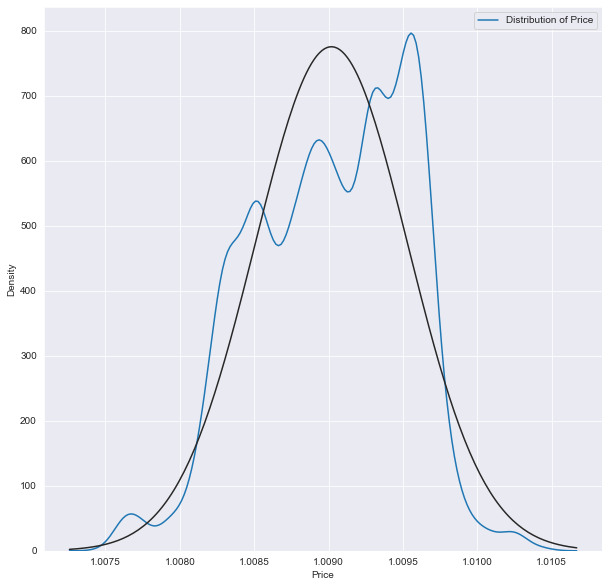

In [32]:
sns.distplot(np.power(df.Price, 1/1000), hist = False, fit = norm, label = 'Distribution of Price')
plt.legend()

print(f'Skewness of Price is {skew(np.power(df.Price,1/1000))}.')
print(f'Kurtosis of Price is {kurtosis(np.power(df.Price,1/1000))}.')

### The values of skewness and kurtosis indicate almost normal distribution for Price. 

In [33]:
df['Price'] = df['Price']/1000
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Dur_Hours,Dur_Minis,Arr_Time_Hour,Arr_Time_Min,DOJ_Day,DOJ_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3.897,22,20,2,50,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7.662,5,50,7,25,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13.882,9,25,19,0,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6.218,18,5,5,25,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13.302,16,50,4,45,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4.107,19,55,2,30,22,25,9,4
10457,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4.145,20,45,2,35,23,20,27,4
10458,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7.229,8,20,3,0,11,20,27,4
10459,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12.648,11,30,2,40,14,10,1,3


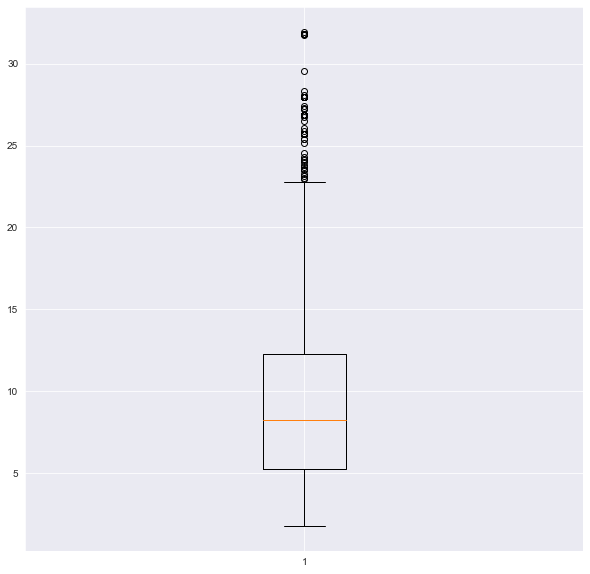

In [34]:
plt.boxplot(df['Price'])

plt.show()

### Variation of Price with categorical variables

#### (1) Price vs Airline

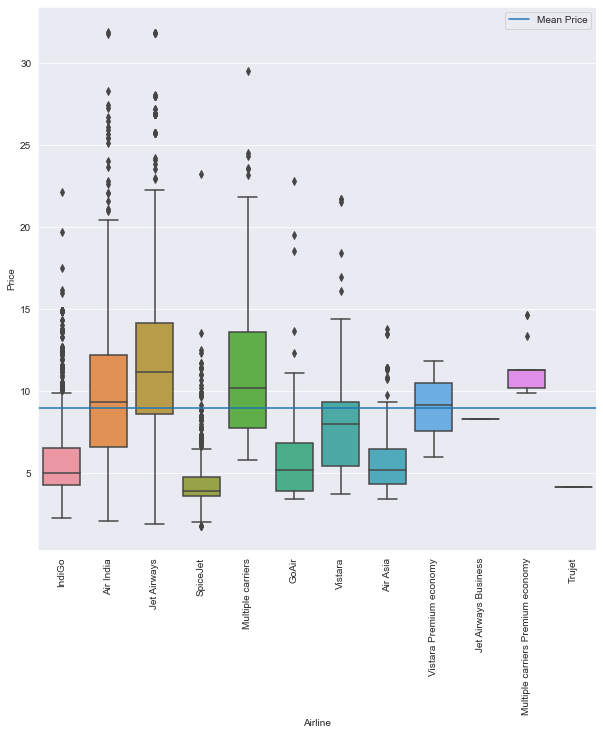

In [35]:
sns.boxplot(y = 'Price', x = 'Airline', data = df)
plt.xticks(rotation=90)
plt.axhline(y = np.mean(df['Price']),label='Mean Price')
plt.legend()
plt.show()

Highest ticket price is for Jet Airways. All airlines except Jet Airways have a mean price lying between 0 to 20 (factored by 1000). Also we see equal number of airlines having mean Price greater than and less than the overall mean Prices.

#### (2) Price vs Source/Destination

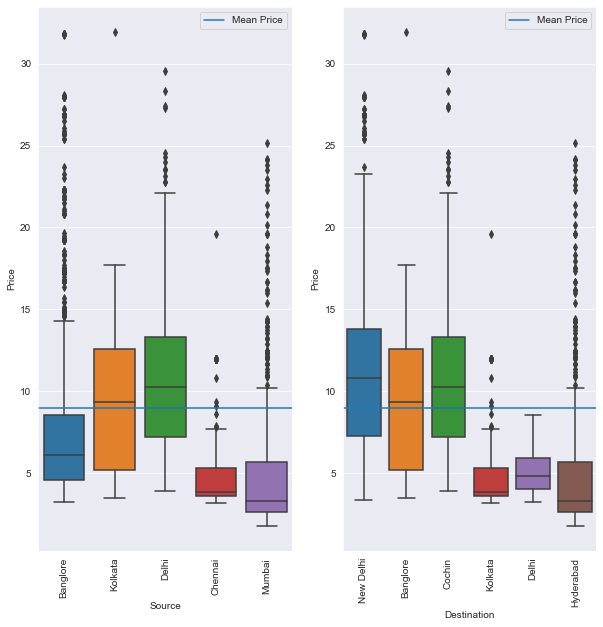

In [36]:
plt.subplot(121)
sns.boxplot(y = 'Price', x = 'Source', data = df)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(122)
sns.boxplot(y = 'Price', x = 'Destination', data = df)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.legend()
plt.xticks(rotation=90)

plt.show()

For Source column, the highest mean price is for Delhi while the lowest is for Mumbai. Also for the Destination column, the highest mean price is for Delhi/New Delhi while the lowest is for Hydrabad.

#### (3) Price vs Total Stops

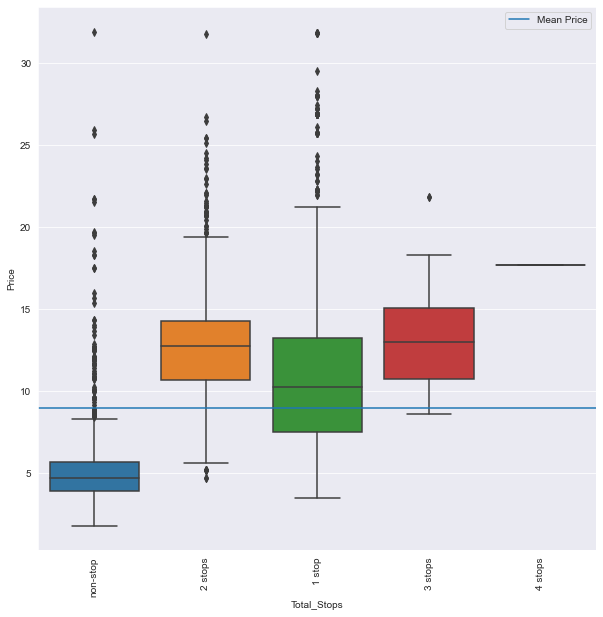

In [37]:
sns.boxplot(y = 'Price', x = 'Total_Stops', data = df)
plt.xticks(rotation=90)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.legend()
plt.show()

For the total_stops column of the data, the maximum total price is that for 1 stop flights while the lowest is for non-stop flights. However, the maximum mean price is that of 2 stop flights while the lowest is again for non-stop flights.

#### (4) Price vs Duration (hours)

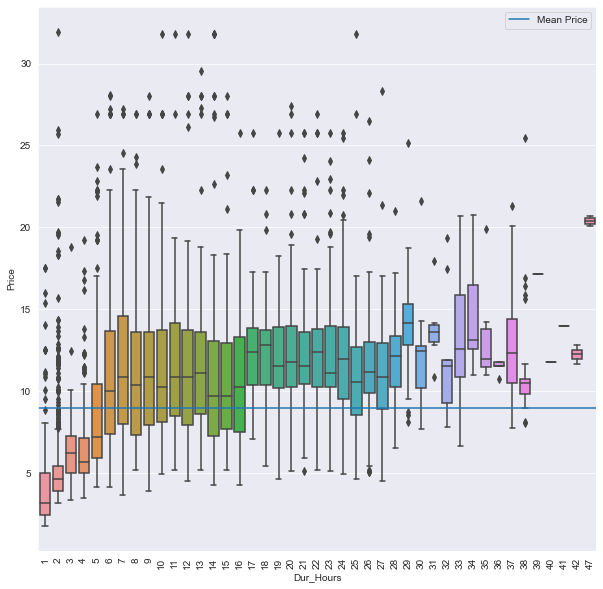

In [38]:
sns.boxplot(y = 'Price', x = 'Dur_Hours', data = df)
plt.xticks(rotation=90)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.legend()
plt.show()

It is clear that flights with a duration of more than 38 hours are rare. Also, as the duration of the flight increases, the price also changes, reaching a peak value at 7 hours and at the lowest at 1 hour flight duration.

#### (5) Price vs Departure (hours)

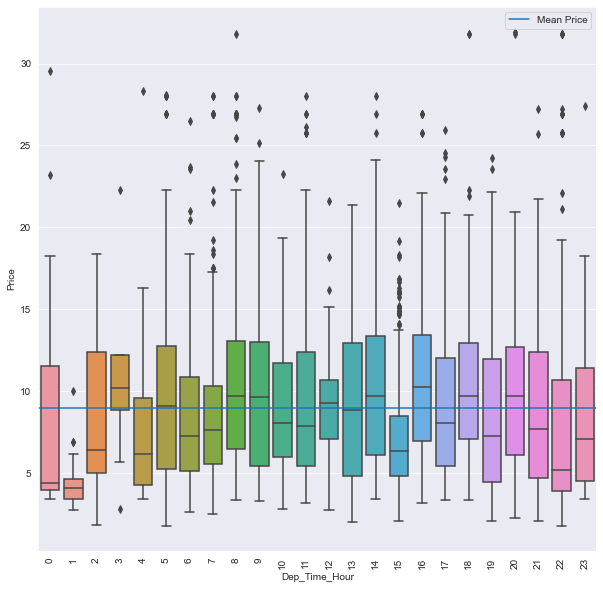

In [39]:
sns.boxplot(y = 'Price', x = 'Dep_Time_Hour', data = df)
plt.xticks(rotation=90)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.legend()
plt.show()

It is clear from above that flights departing early in the morning and late at night have lower prices compared to the flights departing inbetween.

#### (6) Price vs Arrival (hours)

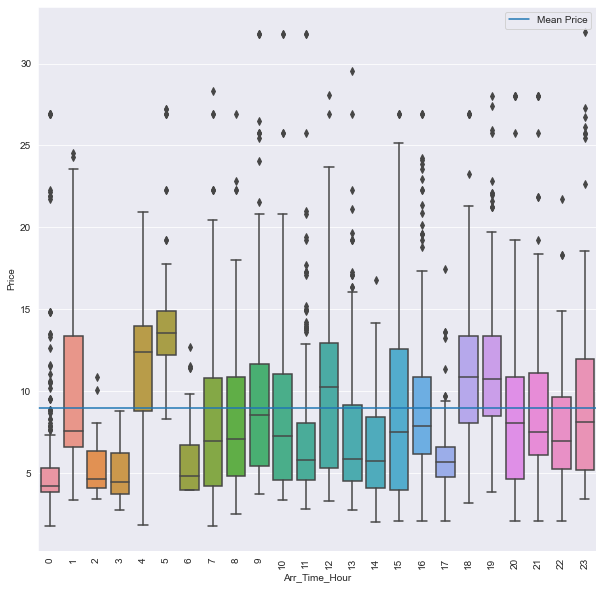

In [40]:
sns.boxplot(y = 'Price', x = 'Arr_Time_Hour', data = df)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Flights with ealy morning and late night arrival timings have a lower mean Price.

#### (7) Price vs DOJ_Day

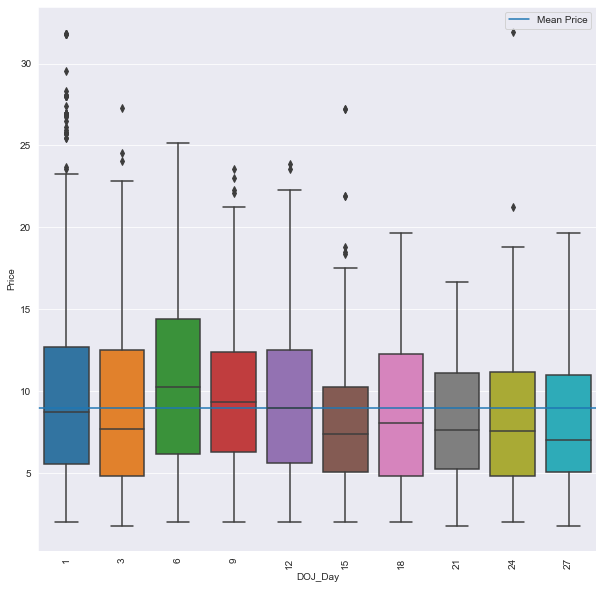

In [41]:
sns.boxplot(y = 'Price', x = 'DOJ_Day', data = df)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Except a few days, alomost all the days the median flight prices were lower than the mean.

#### (8) Price vs DOJ_Month

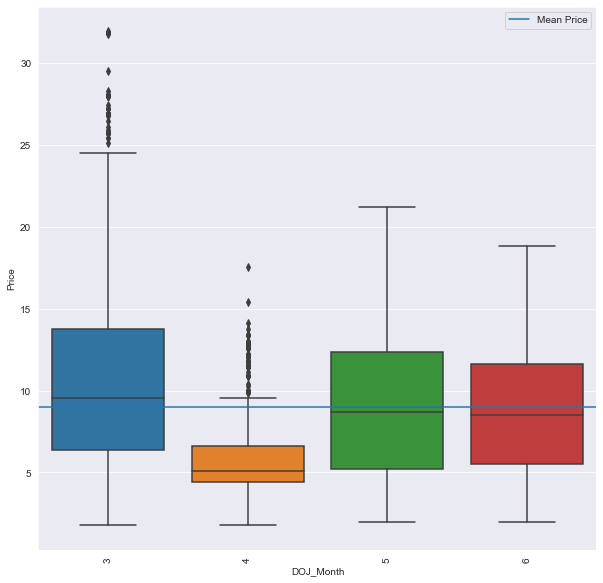

In [42]:
sns.boxplot(y = 'Price', x = 'DOJ_Month', data = df)
plt.axhline(y=np.mean(df['Price']),label='Mean Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

For March,May and June the value of median price is almost equal to the mean price while for April it is way lower compared to the mean.

#### (9) Price vs Additional Info

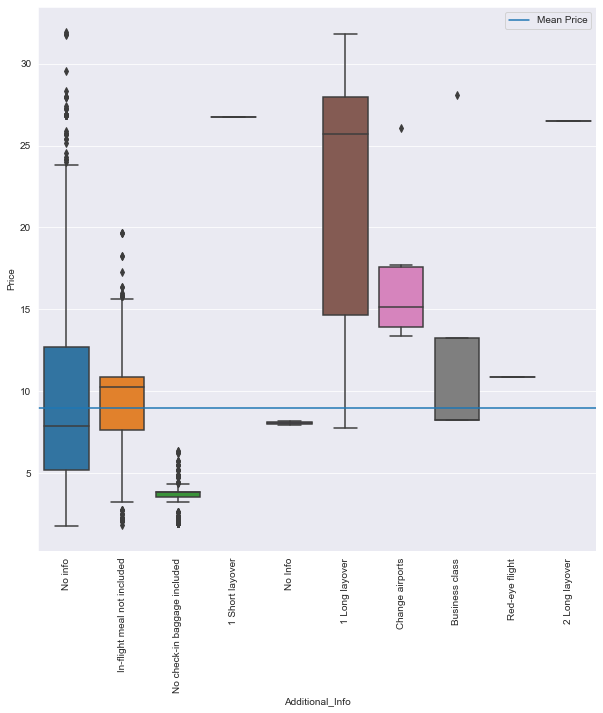

In [43]:
sns.boxplot(y = 'Price', x = 'Additional_Info', data = df)
plt.xticks(rotation=90)
plt.axhline(y = np.mean(df['Price']),label='Mean Price')
plt.legend()
plt.show()

## Encoding of Categorical Variables

In [44]:
l_cat = ['Airline','Source','Destination','Total_Stops','Additional_Info','Route']

for i in l_cat:
    print(f'Number of unique entries in {i}: {len(df[i].unique())}')

Number of unique entries in Airline: 12
Number of unique entries in Source: 5
Number of unique entries in Destination: 6
Number of unique entries in Total_Stops: 5
Number of unique entries in Additional_Info: 10
Number of unique entries in Route: 128


In [45]:
for o in l_cat:
    print(f'In {o}:\n ')
    for p in df[o].unique():
        print(f'{p} will be replaced by {len(df[o][df[o] == p])}.')
    print('\n')

In Airline:
 
IndiGo will be replaced by 2043.
Air India will be replaced by 1693.
Jet Airways will be replaced by 3700.
SpiceJet will be replaced by 815.
Multiple carriers will be replaced by 1196.
GoAir will be replaced by 194.
Vistara will be replaced by 478.
Air Asia will be replaced by 319.
Vistara Premium economy will be replaced by 3.
Jet Airways Business will be replaced by 6.
Multiple carriers Premium economy will be replaced by 13.
Trujet will be replaced by 1.


In Source:
 
Banglore will be replaced by 2179.
Kolkata will be replaced by 2860.
Delhi will be replaced by 4345.
Chennai will be replaced by 381.
Mumbai will be replaced by 696.


In Destination:
 
New Delhi will be replaced by 914.
Banglore will be replaced by 2860.
Cochin will be replaced by 4345.
Kolkata will be replaced by 381.
Delhi will be replaced by 1265.
Hyderabad will be replaced by 696.


In Total_Stops:
 
non-stop will be replaced by 3475.
2 stops will be replaced by 1317.
1 stop will be replaced by 5625

In [46]:
# Performing Frequency Encoding.

for r in ['Airline','Source','Destination','Additional_Info','Total_Stops','Route']:
    
    d_k = list(dict(df[r].value_counts()).keys())
    d_v = list(dict(df[r].value_counts()).values())

    c = 1
    i = 0

    while c <= len(d_k):
        df[r] = df[r].replace(d_k[i], d_v[i])
        c += 1
        i += 1

In [47]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Dur_Hours,Dur_Minis,Arr_Time_Hour,Arr_Time_Min,DOJ_Day,DOJ_Month
0,2043,2179,914,1536,3475,8181,3.897,22,20,2,50,1,10,24,3
1,1693,2860,2860,6,1317,8181,7.662,5,50,7,25,13,15,1,5
2,3700,4345,4345,41,1317,8181,13.882,9,25,19,0,4,25,9,6
3,2043,2860,2860,9,5625,8181,6.218,18,5,5,25,23,30,12,5
4,2043,2179,914,3,5625,8181,13.302,16,50,4,45,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,319,2860,2860,724,3475,8181,4.107,19,55,2,30,22,25,9,4
10457,1693,2860,2860,724,3475,8181,4.145,20,45,2,35,23,20,27,4
10458,3700,2179,1265,1536,3475,8181,7.229,8,20,3,0,11,20,27,4
10459,478,2179,914,1536,3475,8181,12.648,11,30,2,40,14,10,1,3


In [48]:
df.shape

(10461, 15)

## Model Building

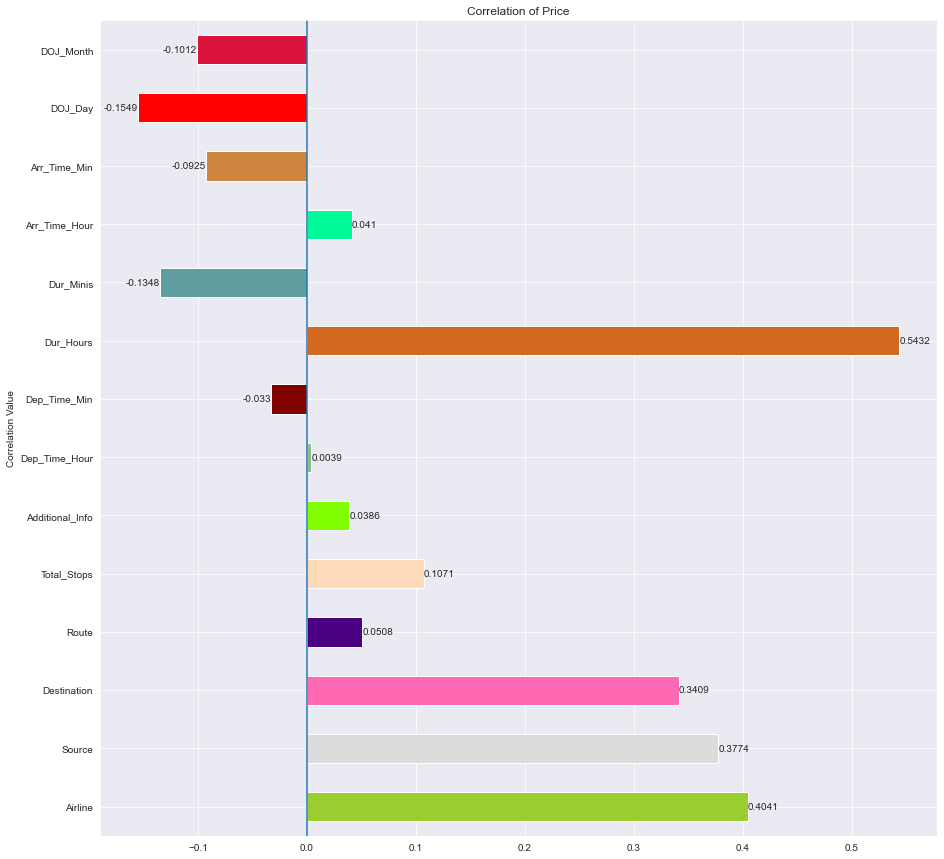

In [49]:
from random import sample

plt.figure(figsize=(15,15))
colors = sample([k for k,v in pltc.cnames.items()], len(df.drop('Price',axis=1).columns))

ax = np.round(df.drop('Price',axis=1).corrwith(df['Price']), 4).plot(kind='barh', color = colors)

for i in ax.containers:
    ax.bar_label(i)
plt.axvline(x=0)
plt.ylabel('Correlation Value')
plt.title('Correlation of Price')
plt.show()

There are many features which do not provide much affect to the value of Price. It is for the best to drop such columns for the sake a time and computational speed. Taking only those values with correlation of greater than 0.2 or less than -0.2 in the training set.

<AxesSubplot:>

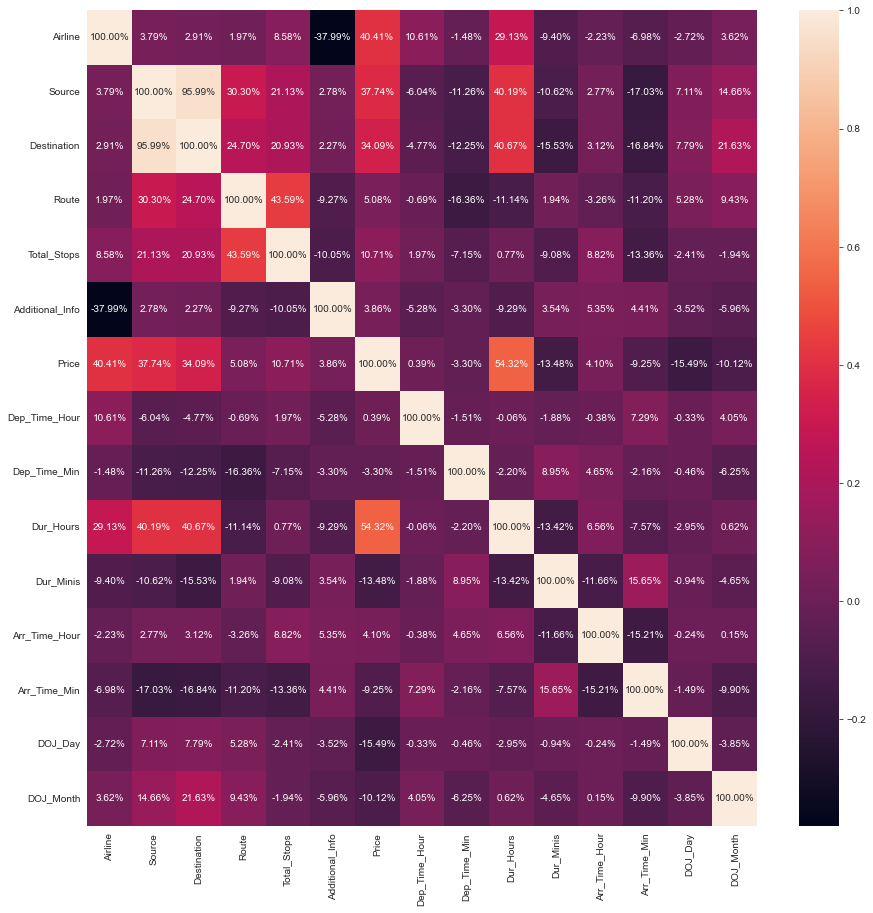

In [50]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

In [51]:
x_all_c = df.drop('Price', axis=1)
y = df.loc[:,['Price']]

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting,enable_iterative_imputer,enable_halving_search_cv
from sklearn.ensemble import ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale

import xgboost
import lightgbm as lgbm

In [53]:
model_lr = LinearRegression()
model_knn = KNeighborsRegressor()

model_svr = SVR()
model_dt = DecisionTreeRegressor()

model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()

model_xgb = xgboost.XGBRegressor()
model_xgbrf = xgboost.XGBRFRegressor()

model_abr = AdaBoostRegressor()
model_etr = ExtraTreesRegressor()

model_hgr = HistGradientBoostingRegressor()
model_lgb = lgbm.LGBMRegressor()

In [54]:
l_model = [model_lr, model_knn, model_svr, model_dt, model_rf, model_gbr, model_xgbrf, model_xgb, model_abr, model_etr, model_hgr, model_lgb]
l_acc = []
l_std = []
l_cv = []

for j in l_model:
    l_acc.append(cross_val_score(j, x_all_c,y).mean())
    l_std.append(cross_val_score(j, x_all_c,y).std())
    l_cv.append(cross_val_score(j, x_all_c,y).std()/cross_val_score(j, x_all_c,y).mean())

In [55]:
l_names = ['LinearRegression()','KNeighborsRegressor()','SVR()','DecisionTreeRegressor()','RandomForestRegressor()',
          'GradientBoostingRegressor()','XGBRFRegressor()','XGBRegressor()','AdaBoostRegressor()','ExtraTreesRegressor()',
          'HistGradientBoostingRegressor()','LGBMRegressor()']

In [56]:
df_i = pd.DataFrame(data=[l_acc, l_std, l_cv]).T
df_i.columns = ['Accuracy','Std_Deviation','COV']
df_i.index = l_names
df_acc = df_i
df_acc

,Accuracy,Std_Deviation,COV
LinearRegression(),0.483451,0.020123,0.041624
KNeighborsRegressor(),0.798855,0.013103,0.016402
SVR(),0.589284,0.019664,0.033369
DecisionTreeRegressor(),0.858054,0.015666,0.016515
RandomForestRegressor(),0.912967,0.005250,0.005512
GradientBoostingRegressor(),0.829353,0.010593,0.012797
XGBRFRegressor(),0.816978,0.010703,0.013101
XGBRegressor(),0.912380,0.011982,0.013132
AdaBoostRegressor(),0.622557,0.018285,0.034156
ExtraTreesRegressor(),0.912035,0.005617,0.006472


## Model Evaluation Results

### In terms of accuracy

In [67]:
print('Best model:')
print(f'Index: {np.where(df_acc.Accuracy == max(df_acc.Accuracy))[0][0]}.')
print(f'Model: {l_model[np.where(df_acc.Accuracy == max(df_acc.Accuracy))[0][0]]}.')
print(f'Accuracy: {df_acc.Accuracy[np.where(df_acc.Accuracy == max(df_acc.Accuracy))[0][0]]}')
print(f'Coefficient of Variation: {df_acc.COV[np.where(df_acc.Accuracy == max(df_acc.Accuracy))[0][0]]}')

Best model:
Index: 4.
Model: RandomForestRegressor().
Accuracy: 0.9129668759033105
Coefficient of Variation: 0.005511768451833675


In [68]:
print('Worst model:')
print(f'Index: {np.where(df_acc.Accuracy == min(df_acc.Accuracy))[0][0]}.')
print(f'Model: {l_model[np.where(df_acc.Accuracy == min(df_acc.Accuracy))[0][0]]}.')
print(f'Accuracy: {df_acc.Accuracy[np.where(df_acc.Accuracy == min(df_acc.Accuracy))[0][0]]}')
print(f'Coefficient of Variation: {df_acc.COV[np.where(df_acc.Accuracy == min(df_acc.Accuracy))[0][0]]}')

Worst model:
Index: 0.
Model: LinearRegression().
Accuracy: 0.4834514684382869
Coefficient of Variation: 0.0416242750011501


### In terms of coefficient of variation

In [69]:
print('Best model: ')
print(f'Index: {np.where(df_acc.COV == min(df_acc.COV))[0][0]}.')
print(f'Model: {l_model[np.where(df_acc.COV == min(df_acc.COV))[0][0]]}.')
print(f'Accuracy: {df_acc.Accuracy[np.where(df_acc.COV == min(df_acc.COV))[0][0]]}')
print(f'Coefficient of Variation: {df_acc.COV[np.where(df_acc.COV == min(df_acc.COV))[0][0]]}')

Best model: 
Index: 4.
Model: RandomForestRegressor().
Accuracy: 0.9129668759033105
Coefficient of Variation: 0.005511768451833675


In [77]:
print('Worst model: ')
print(f'Index: {np.where(df_acc.COV == max(df_acc.COV))[0][0]}.')
print(f'Model: {l_model[np.where(df_acc.COV == max(df_acc.COV))[0][0]]}.')
print(f'Accuracy: {df_acc.Accuracy[np.where(df_acc.COV == max(df_acc.COV))[0][0]]}')
print(f'Coefficient of Variation: {df_acc.COV[np.where(df_acc.COV == max(df_acc.COV))[0][0]]}')

Worst model: 
Index: 0.
Model: LinearRegression().
Accuracy: 0.4834514684382869
Coefficient of Variation: 0.0416242750011501


#### The above shows that for the given dataset, LinearRegression( ) provides both lower accuracy and a larger amount of variability in it's overall output. On the other end, the model with best accuracy and the one with least coefficient of variation is RandomForestRegressor( ).

## Using RandomForestRegressor( )

In [71]:
x_all_c = df.drop('Price', axis=1)
y = df.loc[:,['Price']]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_all_c, y, random_state=1)

model_rf.fit(x_train_f, y_train_f)
y_predict = model_rf.predict(x_test_f)

print(f'R2 score: {r2_score(y_test_f, y_predict)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_predict)}')
print(f'MSE: {mean_squared_error(y_test_f, y_predict)}')
print(f'RMSE: {np.power(mean_squared_error(y_test_f, y_predict), 1/2)}')

R2 score: 0.9031577825973652
MAE: 0.6247959741380881
MSE: 1.8338879362130724
RMSE: 1.3542111859725101


In [72]:
x_all_c = df.drop('Price', axis=1)
y = df.loc[:,['Price']]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_all_c, y, random_state=10)

model_rf.fit(x_train_f, y_train_f)
y_predict = model_rf.predict(x_test_f)

print(f'R2 score: {r2_score(y_test_f, y_predict)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_predict)}')
print(f'MSE: {mean_squared_error(y_test_f, y_predict)}')
print(f'RMSE: {np.power(mean_squared_error(y_test_f, y_predict), 1/2)}')

R2 score: 0.9113200585729893
MAE: 0.6031033515939759
MSE: 1.5776179744651606
RMSE: 1.2560326327230358


In [73]:
x_all_c = df.drop('Price', axis=1)
y = df.loc[:,['Price']]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_all_c, y, random_state=100)

model_rf.fit(x_train_f, y_train_f)
y_predict = model_rf.predict(x_test_f)

print(f'R2 score: {r2_score(y_test_f, y_predict)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_predict)}')
print(f'MSE: {mean_squared_error(y_test_f, y_predict)}')
print(f'RMSE: {np.power(mean_squared_error(y_test_f, y_predict), 1/2)}')

R2 score: 0.9061265819026859
MAE: 0.6296937926314258
MSE: 1.8834317819873987
RMSE: 1.3723817916262948


In [74]:
x_all_c = df.drop('Price', axis=1)
y = df.loc[:,['Price']]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_all_c, y, random_state=1000)

model_rf.fit(x_train_f, y_train_f)
y_predict = model_rf.predict(x_test_f)

print(f'R2 score: {r2_score(y_test_f, y_predict)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_predict)}')
print(f'MSE: {mean_squared_error(y_test_f, y_predict)}')
print(f'RMSE: {np.power(mean_squared_error(y_test_f, y_predict), 1/2)}')

R2 score: 0.9284649688799254
MAE: 0.6060495403924567
MSE: 1.3279636470807026
RMSE: 1.1523730503099692


In [75]:
x_all_c = df.drop('Price', axis=1)
y = df.loc[:,['Price']]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_all_c, y, random_state=10000)

model_rf.fit(x_train_f, y_train_f)
y_predict = model_rf.predict(x_test_f)

print(f'R2 score: {r2_score(y_test_f, y_predict)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_predict)}')
print(f'MSE: {mean_squared_error(y_test_f, y_predict)}')
print(f'RMSE: {np.power(mean_squared_error(y_test_f, y_predict), 1/2)}')

R2 score: 0.9060095554615457
MAE: 0.6248288421981946
MSE: 1.79033778960986
RMSE: 1.3380350479751493


In [76]:
x_all_c = df.drop('Price', axis=1)
y = df.loc[:,['Price']]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_all_c, y, random_state=100000)

model_rf.fit(x_train_f, y_train_f)
y_predict = model_rf.predict(x_test_f)

print(f'R2 score: {r2_score(y_test_f, y_predict)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_predict)}')
print(f'MSE: {mean_squared_error(y_test_f, y_predict)}')
print(f'RMSE: {np.power(mean_squared_error(y_test_f, y_predict), 1/2)}')

R2 score: 0.9247577231268349
MAE: 0.6093436475732369
MSE: 1.4033780912633826
RMSE: 1.1846426006451831


#### The above values show that there is no significant change in the value of metrics of regression with variation in Random State. Therefore the best model to describe the given dataset is RandomForestRegressor().